<a href="https://colab.research.google.com/github/NyalamSaiPrashanth/2311CS020486-SIGMA/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#PART A: Data Wrangling

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [29]:
df = pd.read_csv("/content/decision_tree_regressor_dataset_v2.csv")
df.head()


,Age,Gender,Monthly_Income,Brand_Awareness,Store_Experience,Quality_Rating,Price_Sensitivity,Purchase_Likelihood
0,58,Male,81476,2,1,3,3,1.932503
1,48,Female,64811,2,4,4,5,1.935945
2,34,Male,56208,2,3,4,1,2.375807
3,27,Male,40150,3,4,5,5,2.095519
4,40,Male,91180,3,4,2,2,1.964777


In [34]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [59]:
df['Purchase'] = (df['Quality_Rating'] > 2.0).astype(int)

In [60]:
df.isnull().sum()


,0
Age,0
Gender,300
Monthly_Income,0
Brand_Awareness,0
Store_Experience,0
Quality_Rating,0
Price_Sensitivity,0
Purchase_Likelihood,0
Purchase,0


In [61]:
df.fillna(df.mean(), inplace=True)


In [62]:
df.describe()


,Age,Gender,Monthly_Income,Brand_Awareness,Store_Experience,Quality_Rating,Price_Sensitivity,Purchase_Likelihood,Purchase
count,300.000000,0.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.156667,NaN,80590.326667,2.976667,2.873333,3.086667,2.916667,2.337411,0.626667
std,11.891881,NaN,37285.119038,1.398562,1.425035,1.425692,1.441057,1.006901,0.484498
min,20.000000,NaN,20384.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,30.000000,NaN,47487.750000,2.000000,2.000000,2.000000,2.000000,1.650253,0.000000
50%,41.500000,NaN,76287.500000,3.000000,3.000000,3.000000,3.000000,2.295931,1.000000
75%,51.000000,NaN,111892.250000,4.000000,4.000000,4.000000,4.000000,3.024854,1.000000
max,59.000000,NaN,149695.000000,5.000000,5.000000,5.000000,5.000000,4.909441,1.000000


In [25]:
# PART B: Data Visualization

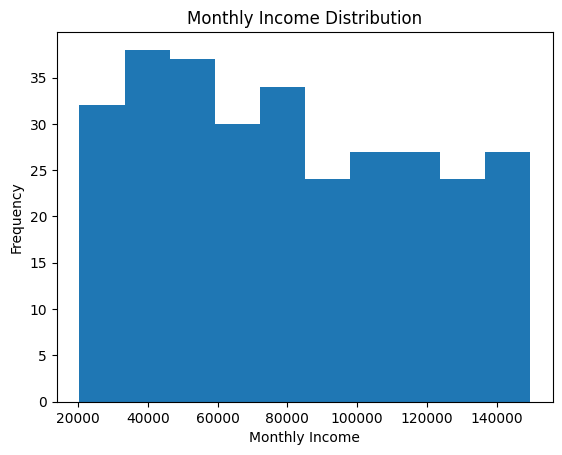

In [63]:
plt.figure()
plt.hist(df['Monthly_Income'], bins=10)
plt.xlabel("Monthly Income")
plt.ylabel("Frequency")
plt.title("Monthly Income Distribution")
plt.show()


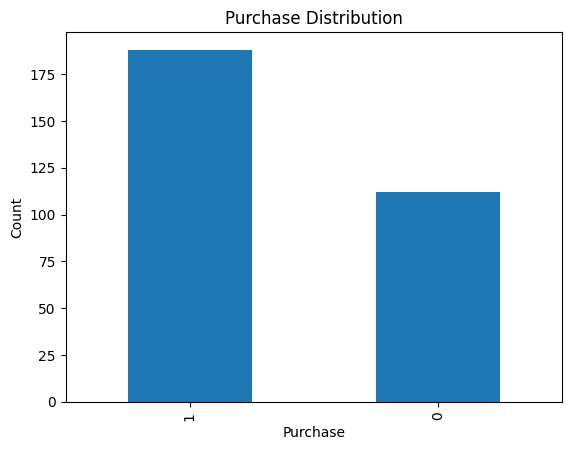

In [64]:
plt.figure()
df['Purchase'].value_counts().plot(kind='bar')
plt.xlabel("Purchase")
plt.ylabel("Count")
plt.title("Purchase Distribution")
plt.show()


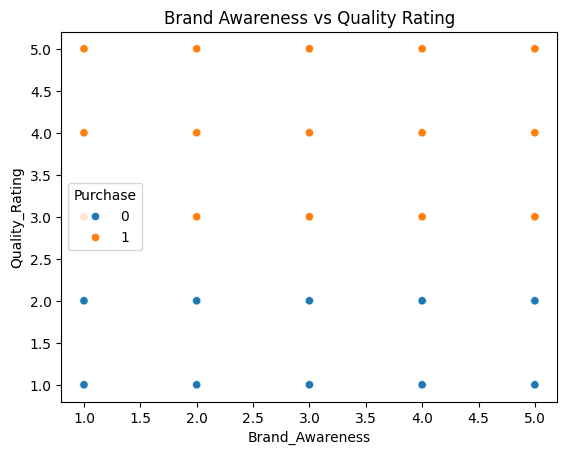

In [65]:
plt.figure()
sns.scatterplot(
    x=df['Brand_Awareness'],
    y=df['Quality_Rating'],
 hue=df['Purchase']
 )
plt.title("Brand Awareness vs Quality Rating")
plt.show()


In [26]:
#PART C: Logistic Regression

In [66]:
X = df.drop('Purchase', axis=1)
y = df['Purchase']


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    )


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Drop 'Gender' and 'Purchase_Likelihood' columns from X_train and X_test
X_train_cleaned = X_train.drop(columns=['Gender', 'Purchase_Likelihood'])
X_test_cleaned = X_test.drop(columns=['Gender', 'Purchase_Likelihood'])

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

model = LogisticRegression(max_iter=1000) # Increased max_iter
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [69]:
y_pred = model.predict(X_test_scaled)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[30  0]
 [ 0 60]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        60

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [27]:
# PART D: Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [72]:
dt_pred = dt_model.predict(X_test)


In [73]:
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))


Accuracy: 1.0
Confusion Matrix:
 [[30  0]
 [ 0 60]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        60

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


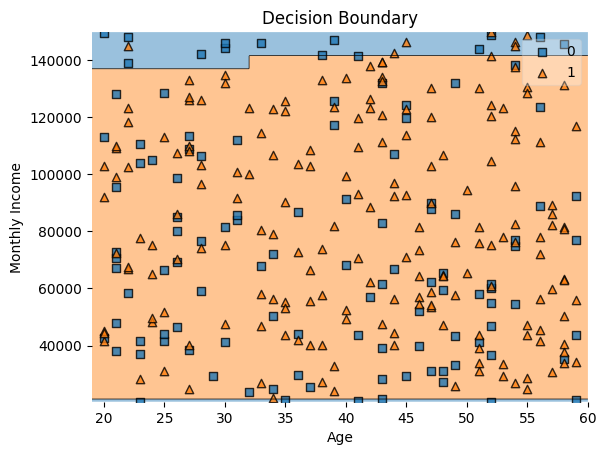

In [75]:
from sklearn.tree import DecisionTreeClassifier
X2 = df[['Age', 'Monthly_Income']]
y2 = df['Purchase']

dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(X2, y2)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X2.values, y2.values, clf=dt2)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Decision Boundary")
plt.show()

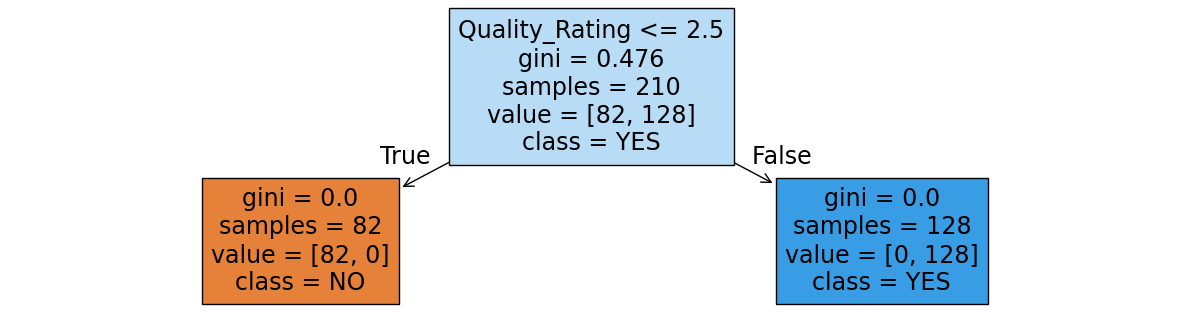

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dt = DecisionTreeClassifier(criterion="gini", random_state=42)
dt.fit(X_train, y_train)
plt.figure(figsize=(15, 4))
plot_tree(
dt,
feature_names=X.columns,
class_names=["NO", "YES"],
filled=True
)
plt.show()